In [179]:
import os
import cv2
import keras
from pickle import load,dump
from PIL import Image
from skimage import exposure
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet import MobileNet
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.preprocessing import image
from keras.models import Sequential,Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Dense
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  
#for inline graphical plotting

In [186]:
path = "./UJTDchar/"
files = os.listdir(path)
character_list = os.listdir(path)
char_big_img = {}
char_small_img = {}
char_ab_threshold = []
num_classes = 124
print(len(character_list))
print(files)
for i in character_list:
    char_small_img[i] = 0  ##no of small images for each character
    char_big_img[i] = 0    ##no of large images for each character
#print(char_big_img)
x = []
y = []
filenames = []
threshold = 40
small_images = 0
avg_height = 0 
avg_width = 0 
valid_images = [".jpg",".gif",".png",".tga"]
dim = (32,32)

124
['ஞ', 'ெ', 'சீ', 'றீ', 'ங', 'ள்', 'ை', 'டு', 'தூ', 'ண்', 'U', 'ல', 'ே', 'று', 'யீ', 'லூ', 'லு', 'ரீ', 'னீ', 'நூ', 'ஙி', 'ற', 'ட்', 'பு', 'கீ', 'டீ', 'றி', 'ஞீ', 'ஙீ', 'லீ', 'ட', 'மூ', 'னி', 'னு', 'ஞி', 'ழூ', 'தி', 'யூ', 'I', 'பீ', 'ணீ', 'ற்', 'ணூ', 'டூ', 'ல்', 'லி', 'சூ', 'கு', 'ர', 'ணு', 'க', 'ந்', 'க்', 'Aa', 'றூ', 'ம', 'ம்', 'ஞூ', 'மி', 'வ', 'பூ', 'வி', 'சி', 'ஒ', 'ளூ', 'நி', 'கி', 'எ', 'ன', 'ஏ', 'மீ', 'ழி', 'தீ', 'ஙு', 'ரி', 'வீ', 'ரு', 'ர்', 'நீ', 'ழ்', 'ழ', 'ளி', 'கூ', 'ன்', 'நு', 'ங்', 'ளு', 'மு', 'வூ', 'ப', 'ரூ', 'யு', 'ந', 'ஐ', 'ச்', 'த', 'ஓ', 'ய்', 'ஙூ', 'ா', 'ணி', 'ய', 'ழீ', 'து', 'த்', 'ஞ்', 'பி', 'சு', 'ச', 'ப்', 'ஞு', 'ளீ', 'ள', 'வ்', 'னூ', 'ஃ', 'A', 'வு', 'Uu', 'ழு', 'யி', 'டி', 'ண', 'Ii']


In [201]:
def loading_images():
    for i,file in enumerate(files):
        path1 = os.path.join(path,file)
        images = os.listdir(path1)
        for image in images:
            ext = os.path.splitext(image)
            if ext[1].lower() in valid_images:
                img = cv2.imread(os.path.join(path1,image),0)
                img_eq = exposure.equalize_hist(img)
                #print(img.shape)
                avg_height = avg_height + img.shape[1]
                avg_width = avg_width + img.shape[0]
                if img.shape < dim:
                    #print(img.shape)
                    small_images+=1
                    #print(os.path.join(path1,image))
                    split = os.path.split(os.path.join(path1,image))
                    #print(split)
                    split1 = os.path.split(split[0])
                    #print(split1)
                    if split1[1] in character_list:
                        char_small_img[split1[1]]+=1
                    img_resize = cv2.resize(img_eq, dim, interpolation = cv2.INTER_AREA)
                else:
                    split = os.path.split(os.path.join(path1,image))
                    #print(split)
                    split1 = os.path.split(split[0])
                    #print(split1)
                    if split1[1] in character_list:
                        char_big_img[split1[1]]+=1
                    #print(img.shape)
                    img_resize = cv2.resize(img_eq, dim, interpolation = cv2.INTER_AREA)
                    #img_eq = exposure.equalize_hist(img_resize)
                x.append(img_resize)
                    #y.append(i)
    avg_height = (avg_height//12400)
    avg_width = (avg_width//12400)
    #print("avg width",avg_width)
    #print("avg height",avg_height)
    #print(char_small_img)
    #print(char_big_img)
    for key,val in char_big_img.items():
        if val > threshold:
            char_ab_threshold.append(key)
            print(val)
    print(char_ab_threshold)    
    #print("No of images smaller than 32*32",small_images)

In [ ]:
loading_images()

In [200]:
def load_img_for_11_classes():
    for i,file in enumerate(files):
        path1 = os.path.join(path,file)
        images = os.listdir(path1)
        for image in images:
            ext = os.path.splitext(image)
            if ext[1].lower() in valid_images:
                img = cv2.imread(os.path.join(path1,image),0)
                img_eq = exposure.equalize_hist(img)
                #blur = cv2.GaussianBlur(img,(5,5),0)
                if img.shape >= dim:
                    split = os.path.split(os.path.join(path1,image))
                    #print(split)
                    split1 = os.path.split(split[0])
                    #print(split1)
                    if split1[1] in char_ab_threshold:
                        img_resize = cv2.resize(img_eq, dim, interpolation = cv2.INTER_AREA)
                        x.append(img_resize)
                        #filenames.append(os.path.join(path1,image))

In [188]:
x_train = np.array(x)
x_train = np.expand_dims(x,axis=-1)
print(x_train.shape)

(12400, 32, 32, 1)


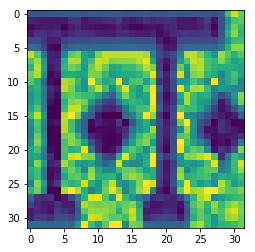

In [189]:
plt.imshow(img_resize) ##sample image visualizing 

In [190]:
#num_classes = len(char_ab_threshold)
#label_list = [0 for i in range(1,101)] + [1 for i in range(1,101)]+ [2 for i in range(1,101)]
#label_to_char_mapping = {0 : 'A' , 1 : 'Aa' , 2 : 'I'}
#print(label_to_char_mapping)
def create_labels_for_11_classes():
    label_list = []
    temp = []
    """for j in range(0,len(char_ab_threshold)):    
        temp = [j for i in range(0,char_big_img[key]) if key in char_ab_threshold]
        label_list = label_list + temp
    """
    label_list = [0 for i in range(1,43)] + [1 for i in range(1,44)]+ [2 for i in range(1,43)] + [3 for i in range(1,46)] + [4 for i in range(1,43)] + [5 for i in range(1,42)] + [6 for i in range(1,46)] + [7 for i in range(1,43)]+ [8 for i in range(1,42)] + [9 for i in range(1,43)] + [10 for i in range(1,44)]
    print(label_list) 
    y_train = np.asarray(label_list)
    y_train = keras.utils.to_categorical(y_train, num_classes)
    print(y_train.shape)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
    print(x_train.shape)
    print(x_val.shape)
    print(y_train.shape)
    print(y_val.shape)

In [191]:
def prepare_labels(num_classes):
    #num_classes = 124
    #label_to_char_mapping = {0 : 'A' , 1 : 'Aa' , 2 : 'I'}
    #print(label_to_char_mapping)
    label_list = []
    for j in range(0,num_classes):
        temp = [j for i in range(1,101)]
        label_list = label_list + temp 
    print(label_list)    
    y_train = np.asarray(label_list)
    y_train = keras.utils.to_categorical(y_train, num_classes)
    print(y_train.shape)
    #x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
    return y_train

In [195]:
def split_train_val(x_train,y_train):
    x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.33,random_state=42)
    return x_train,x_val,y_train,y_val

In [202]:
def data_augment(x_train,y_train):
    x_train = x_train.astype('float32')
    datagen = ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True)
    os.makedirs('aug_images')
    datagen.fit(x_train)
    for X_batch, y_batch in datagen.flow(x_train, y_train, batch_size=9,save_to_dir='aug_images',save_format='jpg'):
        # create a grid of 3x3 images
        for i in range(0, 9):
            plt.subplot(330 + 1 + i)
            plt.imshow(X_batch[i].reshape(32,32),cmap=plt.get_cmap('gray'))
        # show the plot
        plt.show()
        break

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

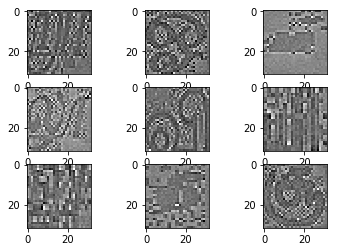

In [197]:
y_train = prepare_labels(num_classes)
x_train,x_val,y_train,y_val = split_train_val(x_train,y_train)
data_augment(x_train,y_train)




In [198]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(64,(3 , 3) , activation = 'relu'))
    model.add(Conv2D(64,(3 , 3) , activation = 'relu'))
    model.add(Conv2D(64,(3 , 3) , activation = 'relu'))
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(124,activation='softmax'))

    model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
    print(model.summary())
    checkpointer = ModelCheckpoint(filepath='model.hdf5',monitor='val_loss',verbose=1, save_best_only=True)
    earlystopping = EarlyStopping(monitor='val_loss',patience=10)
    history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=32),
                        steps_per_epoch=x_train.shape[0] // 32,
                        epochs=50,validation_data=datagen.flow(x_val,y_val,batch_size=32),callbacks=[checkpointer,earlystopping])
    with open('trainHistory124', 'wb') as fp:
        dump(history.history, fp)
    return model
    #model.fit(x_train, y_train,batch_size=32,epochs=100,verbose=1,validation_split=0.2)

In [199]:
model = cnn_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 8, 8, 64)          36928     
__________

KeyboardInterrupt: 

In [182]:
def load_test_image(model):
    imgA = cv2.imread('./UJTDchar/A/Ta (87).jpg',0)
    img_eqA = exposure.equalize_hist(imgA)
    img_resizeA = cv2.resize(img_eqA, dim, interpolation = cv2.INTER_AREA)
    plt.imshow(img_resizeA)
    x1 = np.array(img_resizeA)
    x1 = np.expand_dims(x1,axis=-1)
    x1 = np.expand_dims(x1,axis=0)
    print(x1.shape)
    prediction = model.predict_on_batch(x1)
    return prediction

(1, 32, 32, 1)
[[  3.26094067e-07   8.79477651e-04   2.47606455e-04   3.27060366e-06
    7.71726221e-08   3.32837262e-05   7.22311199e-01   5.33266648e-05
    3.77459664e-08   7.50840456e-07   2.09209466e-04   5.20814210e-05
    9.63917591e-06   7.94726020e-06   9.64776613e-04   3.95393528e-07
    1.98974547e-07   1.39086769e-05   8.82167284e-10   2.58981657e-07
    2.07184621e-06   7.76791654e-04   1.46868333e-01   1.69665285e-03
    3.31738903e-07   5.34557155e-04   1.92059382e-08   2.50208188e-07
    2.00048235e-05   1.74215984e-05   1.41125955e-02   1.81394171e-05
    1.60781664e-08   1.37630451e-07   5.25642285e-09   8.01494366e-07
    4.15533094e-07   2.08061501e-05   4.77743424e-06   4.22147074e-04
    7.25255633e-09   6.23865577e-04   7.89258614e-09   1.15580906e-05
    1.10154208e-04   4.58328941e-06   5.09224485e-08   4.69649858e-05
    7.52693450e-04   1.95858245e-08   1.52382040e-06   4.30296459e-05
    7.40426040e-05   3.14598509e-07   4.52168933e-07   2.10467988e-04
    4

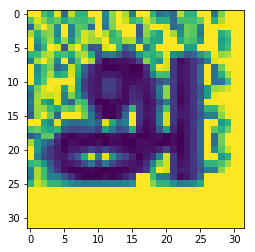

In [183]:
prediction = load_test_image(model)
print(prediction)

In [184]:
def plot_model():
    history = load(open("trainHistory124", "rb"))
    print(history['acc'])
    print(history.keys())
    # summarize history for accuracy
    plt.plot(history['acc'])
    plt.plot(history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('model_accuracy124.png')
    plt.show()
    # summarize history for loss
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.savefig('model_loss124.png')
    plt.show()

[0.24649589173873881, 0.65357660711416588, 0.76752054138192816, 0.83289028521953079, 0.87010633150352379, 0.89826002894189982, 0.91505558240695983, 0.92158047362996387, 0.93728854516210502, 0.94441759298249917, 0.94876752054132429, 0.95988400193330115, 0.96060898985016918, 0.96435476075398741, 0.96411309808622303, 0.96834219429676172, 0.96906718221362975, 0.97039632678550469, 0.97104247104247099, 0.97495159728944825, 0.96955050749154181, 0.97667955531193584, 0.97704204929917837]
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


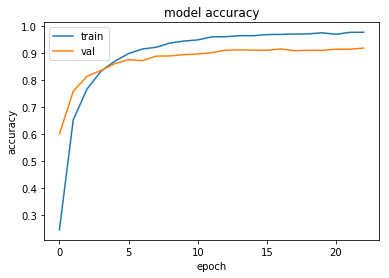

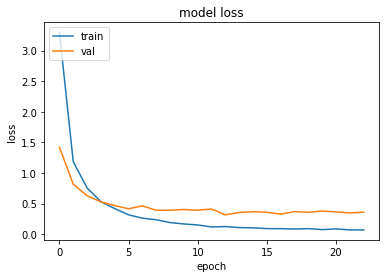

In [185]:
plot_model()